In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
from preprocessing import*
from model.convolutional_neural_network import *
from model.Executor import *
import warnings  
warnings.filterwarnings("ignore")

import torch.nn.functional as functional


# Training Data

The statistics on the size of our dataset.

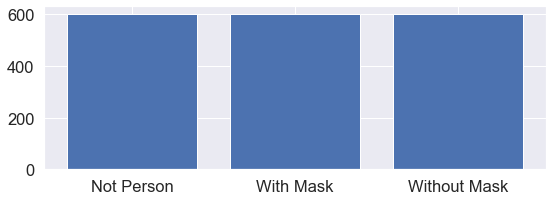

In [26]:
names = ['Not Person', 'With Mask', 'Without Mask']
N = []
N.append(len(os.listdir("./dataset/NotPerson")))
N.append(len(os.listdir("./dataset/WithMask")))
N.append(len(os.listdir("./dataset/WithoutMask")))
plt.figure(figsize=(9, 3))
plt.bar(names, N)
plt.show()

Create datasets for training and testing the model.

In [28]:
dataset = load_data("./dataset")
tr_ds, te_ds = split_data(dataset)
tr_loader = train_dataloarder(tr_ds)
te_loader = test_dataloarder(te_ds)

# Deep Learning

Implementing and training the CNN model.

In [29]:
num_epochs = 20
exec_obj = Executor()
all_loss,iter_loss,accuracy = exec_obj.training_model_executor(
    tr_loader,
    num_epochs
)


  0/20... rate=0 Hz, eta=?, total=0:00:00, wall=14:12 EST
current iter acc: 84.5926
current iter loss: 75.9757
  1/20... rate=0.03 Hz, eta=0:09:54, total=0:00:31, wall=14:12 EST
current iter acc: 84.0000
current iter loss: 62.1709
  2/20... rate=0.03 Hz, eta=0:09:10, total=0:01:01, wall=14:13 EST
current iter acc: 92.1481
current iter loss: 54.8989
  3/20... rate=0.03 Hz, eta=0:08:57, total=0:01:34, wall=14:13 EST
current iter acc: 92.8148
current iter loss: 50.3295
  4/20... rate=0.03 Hz, eta=0:08:26, total=0:02:06, wall=14:14 EST
current iter acc: 94.5185
current iter loss: 46.8747
  5/20... rate=0.03 Hz, eta=0:07:48, total=0:02:36, wall=14:14 EST
current iter acc: 88.3704
current iter loss: 43.0389
  6/20... rate=0.03 Hz, eta=0:07:11, total=0:03:04, wall=14:15 EST
current iter acc: 92.9630
current iter loss: 40.1166
  7/20... rate=0.03 Hz, eta=0:06:35, total=0:03:32, wall=14:15 EST
current iter acc: 96.9630
current iter loss: 37.6420
  8/20... rate=0.03 Hz, eta=0:06:03, total=0:04:0

In [30]:
testdata_accuracy = exec_obj.calculate_model_accuracy(te_loader)
print("Model accuracy for test dataset :",testdata_accuracy)
print(len(te_ds))

Model accuracy for test dataset : 96.66666666666667
450


# Evaluation

Confusion matrix.

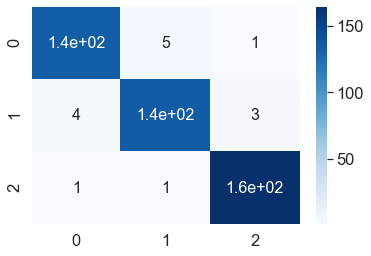

In [31]:
calc_model_weights, actual_results = next(iter(te_loader))
model_net = exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()

Creating a table of results in order to show the accuracy, precision, recall and f1-score.

In [32]:
report = classification_report(
    actual_results.numpy(),
    pred_vals.numpy(), 
    target_names=['with mask','without mask','not a person']
)
print(report)  

              precision    recall  f1-score   support

   with mask       0.96      0.96      0.96       141
without mask       0.96      0.95      0.95       143
not a person       0.98      0.99      0.98       166

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



# Saving the trained model.

In [33]:
save_path = os.path.join(os.path.abspath("."), "trained_model.pt")
# torch.save(exec_obj.network.state_dict(), save_path)

exec_obj = Executor()

model = convolutional_neural_network.convolutional_neural_network()

model.load_state_dict(torch.load(save_path))

exec_obj.network = model

In [34]:
dataset_female = load_data("./biasTestData/Female")
dataset_male = load_data("./biasTestData/Male")
dataset_all = load_data("./biasTestData/All")

te_loader_female = test_dataloarder(dataset_female)
te_loader_male = test_dataloarder(dataset_male)
te_loader_all = test_dataloarder(dataset_all)

print("Model accuracy for test dataset(Female):", exec_obj.calculate_model_accuracy(te_loader_female))
print("Model accuracy for test dataset(Male):", exec_obj.calculate_model_accuracy(te_loader_male))
print("Model accuracy for test dataset(All):", exec_obj.calculate_model_accuracy(te_loader_all))



Model accuracy for test dataset(Female): 89.66666666666666
Model accuracy for test dataset(Male): 90.0
Model accuracy for test dataset(All): 94.22222222222221
